In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from math import sqrt

transformar_features = True
data = pd.read_csv('./df_input.csv', sep=';', delimiter=';')
one_hot_encoder = OneHotEncoder(sparse=False)

In [2]:
busline_filter = 41
df_dados = data.loc[data['linha'] == busline_filter]
encoded_model_data = df_dados.copy()
encoded_model_data[['domingo','segunda', 'terca', 'quarta', 'quinta', 'sexta', 'sabado']] = one_hot_encoder.fit_transform(df_dados['d_semana'].values.reshape(-1,1))
df_dados_model = encoded_model_data.copy()
display(df_dados_model)

,linha,data_hora,validations_per_hour,d_semana,hour_sin,hour_cos,hora,d_mes,d_ano,mes,semana_do_mes,domingo,segunda,terca,quarta,quinta,sexta,sabado
2418,41,2020-03-01 04:00:00,25,6,8.878852e-01,0.460065,4,1,61,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2419,41,2020-03-01 05:00:00,168,6,9.790841e-01,0.203456,5,1,61,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2420,41,2020-03-01 06:00:00,310,6,9.976688e-01,-0.068242,6,1,61,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2421,41,2020-03-01 07:00:00,339,6,9.422609e-01,-0.334880,7,1,61,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2422,41,2020-03-01 08:00:00,286,6,8.169699e-01,-0.576680,8,1,61,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418148,41,2020-12-31 20:00:00,138,3,-7.308360e-01,0.682553,20,31,366,12,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1418149,41,2020-12-31 21:00:00,83,3,-5.195840e-01,0.854419,21,31,366,12,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1418150,41,2020-12-31 22:00:00,54,3,-2.697968e-01,0.962917,22,31,366,12,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1418151,41,2020-12-31 23:00:00,30,3,-2.449294e-16,1.000000,23,31,366,12,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0


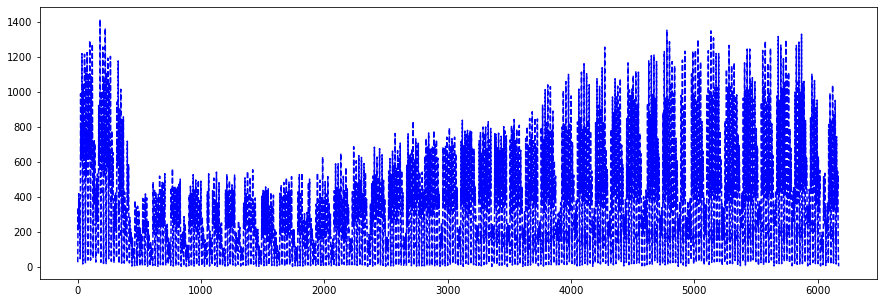

In [3]:
plt.figure(figsize=(15,5))
plt.plot(range(len(df_dados)),df_dados['validations_per_hour'], 'b--')
# plt.xlim(300,400)
plt.show()

In [4]:
feature_names = ['semana_do_mes', 'd_ano', 'hour_sin', 'hour_cos', 'd_mes', 'domingo','segunda', 'terca', 'quarta', 'quinta', 'sexta', 'sabado']

if(transformar_features): 
    scaler = MinMaxScaler(feature_range=(0, 1))

    df_dados_model[feature_names] = scaler.fit_transform(df_dados_model[feature_names])

    df_dados_model
df_dados_model

,linha,data_hora,validations_per_hour,d_semana,hour_sin,hour_cos,hora,d_mes,d_ano,mes,semana_do_mes,domingo,segunda,terca,quarta,quinta,sexta,sabado
2418,41,2020-03-01 04:00:00,25,6,0.944980,0.728769,4,0.0,0.164384,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2419,41,2020-03-01 05:00:00,168,6,0.990686,0.599865,5,0.0,0.164384,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2420,41,2020-03-01 06:00:00,310,6,1.000000,0.463380,6,0.0,0.164384,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2421,41,2020-03-01 07:00:00,339,6,0.972231,0.329437,7,0.0,0.164384,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2422,41,2020-03-01 08:00:00,286,6,0.909439,0.207971,8,0.0,0.164384,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418148,41,2020-12-31 20:00:00,138,3,0.133728,0.840534,20,1.0,1.000000,12,0.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1418149,41,2020-12-31 21:00:00,83,3,0.239601,0.926869,21,1.0,1.000000,12,0.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1418150,41,2020-12-31 22:00:00,54,3,0.364786,0.981372,22,1.0,1.000000,12,0.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1418151,41,2020-12-31 23:00:00,30,3,0.500000,1.000000,23,1.0,1.000000,12,0.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [8]:
X = df_dados_model.filter(['semana_do_mes', 'hour_sin', 'hour_cos','d_ano', 'd_mes', 'domingo','segunda', 'terca', 'quarta', 'quinta', 'sexta', 'sabado'], axis=1)
y = df_dados_model.validations_per_hour
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)


579722     629
388774     209
1363314    270
795248     450
888761      71
          ... 
679108     702
388763     249
918599     445
501586     364
645865      41
Name: validations_per_hour, Length: 4937, dtype: int64

In [6]:
def getModel():
    model = tf.keras.Sequential()
    
    # MLP    
#     model.add(tf.keras.layers.Dense(300, activation="relu", input_shape=(X_train.shape[1], X_train.shape[2])))
#     model.add(tf.keras.layers.Dense(100, activation="relu"))
#     model.add(tf.keras.layers.Dense(30, activation="relu"))
#     model.add(tf.keras.layers.Dense(10, activation="relu"))
    
    # Vanilla LSTM
    # model.add(tf.keras.layers.LSTM(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
        
    # Stacked LSTM
    model.add(tf.keras.layers.LSTM(100, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]) ))
    model.add(tf.keras.layers.LSTM(75, activation='relu', return_sequences=True))
    model.add(tf.keras.layers.LSTM(50, activation='relu', return_sequences=True))
    model.add(tf.keras.layers.LSTM(10, activation='relu'))
    
    # Bidirectional LSTM
#     model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])))
    
    model.add(tf.keras.layers.Dense(units=1,activation='softplus'))
    # model.add(tf.keras.layers.Dense(units=1))

    return model

In [7]:
model = getModel()

optimizer = tf.keras.optimizers.Adam(0.002)

model.compile(
  loss='mse',
  optimizer=optimizer
)
# model.compile(
#   loss='mean_squared_error',
#   optimizer=tf.keras.optimizers.SGD(0.05)
# )

model.summary()

IndexError: tuple index out of range

In [ ]:
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, min_delta=1e-4, mode='min')]

callbacks.append(tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, restore_best_weights=True))

history = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=48,
    validation_split=0.2,
    callbacks=callbacks,
    shuffle=False
)

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
# PREVENDO test_size DIAS

preds = []

base_teste = np.copy(X_test)

for i in range(len(base_teste)):
    
    y_pred = model.predict(np.array([base_teste[i]]))[0][0]

    preds.append(y_pred)

    for k in range(len(preds)):
        
        if k < time_steps:
            if(i<len(base_teste)-1):
                base_teste[i+1][0][(time_steps-1)-k] = preds[(len(preds)-1)-k]

# preds

In [ ]:
base_teste[0].shape

In [ ]:
# APLICANDO O INVERSE SCALING NOS DADOS

dados_pred = {'validations_per_hour': preds,'d_semana': [0] * test_size,'d_mes': [0] * test_size,'d_ano': [0] * test_size}

df_dados_model = df_dados_model.append(pd.DataFrame(data=dados_pred))

if(transformar_features):
    df_dados_model[feature_names] = scaler.inverse_transform(df_dados_model[feature_names])

df_dados_real_predito = df_dados_model.tail(test_size*2)

dados_real = df_dados_real_predito [0:test_size]['validations_per_hour'].to_numpy()

dados_predito = df_dados_real_predito [test_size:test_size*2]['validations_per_hour'].to_numpy()


# dados_predito

In [ ]:
df_real_predito = pd.DataFrame({'real':dados_real,'predito':dados_predito})

df_real_predito

In [ ]:
plt.figure(figsize=(15,5))
# plt.plot(range(len(y_train)),y_train, 'g--')
plt.plot(range(len(df_real_predito['predito'])),df_real_predito['predito'], 'g--')
plt.plot(range(len(df_real_predito['real'])),df_real_predito['real'], 'b')
# plt.xlim(0,200)
# plt.ylim(40,200)
plt.show()

In [ ]:
plt.scatter(df_real_predito['real'],df_real_predito['predito'])

plt.xlabel('Real')
plt.ylabel('Predito')

plt.show()
print('r2=',r2_score(df_real_predito['real'].array,df_real_predito['predito'].array))
print('rmse=',sqrt(mean_squared_error(df_real_predito['real'].array,df_real_predito['predito'].array)))
print('mae=',mean_absolute_error(df_real_predito['real'].array,df_real_predito['predito'].array))